# NetworkX のチュートリアル
NetworkX: Python のグラフ可視化ツール
出来ること: 有向グラフ、無向グラフ、重み付きネットワーク、 etc

In [491]:
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Tuple
import pandas as pd

## グラフの作成と、ノードの追加


### 視覚化のためのユーティリティ関数の作成
先にグラフをどのように描画しているのかをわかりやすくするための関数を作ります。

In [492]:
def plot_graph(G: nx.Graph, subs: Tuple=(1,1,1)):
    plt.subplot(*subs)
    nx.draw(G, with_labels=True, font_family="Source Han Sans JP", font_weight='bold')
    plt.show()

### シンプルなグラフ・ノードの作成

In [493]:
# グラフの作成
G = nx.Graph()

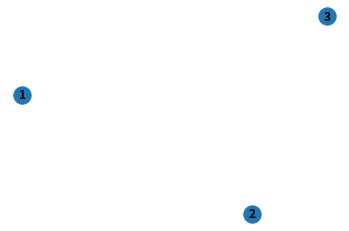

In [494]:
# ノードの追加

# ノードを一つ追加
G.add_node(1)

# ノードを複数追加
G.add_nodes_from([2, 3])

plot_graph(G)

In [495]:
H = nx.path_graph(10)
# パスからなるグラフ
# => 0 -> 9 までをパスでつないだもの
H.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

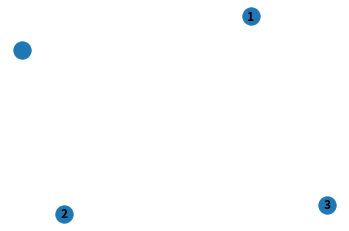

In [496]:
# 再帰的なグラフの追加

# パスからなるグラフ
H = nx.path_graph(10)

# グラフをグラフに追加
G.add_node(H)
plot_graph(G)

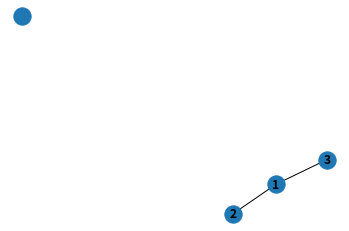

In [497]:
# エッジを一つ追加する
G.add_edge(1, 2)

# エッジを複数追加する
G.add_edges_from([(1, 2), (1, 3)])
plot_graph(G)

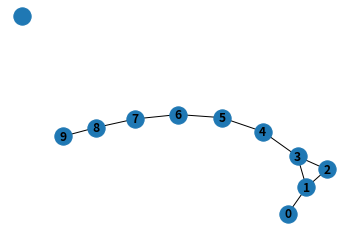

In [498]:
# グラフからエッジを追加する
G.add_edges_from(H.edges)
plot_graph(G)

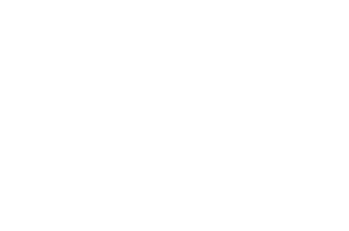

In [499]:
# グラフの初期化
G.clear()
plot_graph(G)

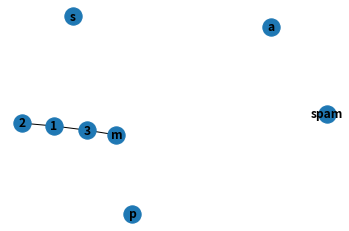

In [500]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # add the node "spam"
G.add_nodes_from("spam") # add these nodes "s" "p" "a" "m"
G.add_edge(3, 'm')
plot_graph(G)

In [501]:
# グラフのノード数、エッジ数
info = {"#node": G.number_of_nodes(), "#edge": G.number_of_edges()}
pd.DataFrame(info.values(), index=info.keys(), columns=["value"])

,value
#node,8
#edge,3


In [502]:
info = {"nodes": str(list(G.nodes)), "edges": str(list(G.edges)), "neighbors of 1": str(list(G.adj[1])), "degree of 1": G.degree[1]}
pd.DataFrame(info.values(), index=info.keys(), columns=['value'])

,value
nodes,"[1, 2, 3, 'spam', 's', 'p', 'a', 'm']"
edges,"[(1, 2), (1, 3), (3, 'm')]"
neighbors of 1,"[2, 3]"
degree of 1,2


G.edges([2, "m"])

## 重み付きグラフ

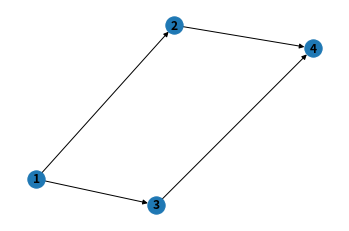

In [537]:
FG = nx.DiGraph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.3)])
plot_graph(FG)

### 重み付きグラフのための視覚化関数

In [555]:
def plot_graph_with_weight(FG: nx.Graph, subs: Tuple=(1,1,1), figsize: Tuple=(10, 3), direct: bool=False):
    
    pos = nx.spring_layout(FG, k=1.0)
    plt.figure(figsize=figsize)
    plt.subplot(*subs)
    plt.axis("off")
    nx.draw_networkx_nodes(FG, pos=pos, alpha=0.2, node_color="white", node_size=300 * 5, node_shape='o', linewidths=2.0, edgecolors="black")
    nx.draw_networkx_labels(FG, pos=pos, alpha=1.0, font_color="black", font_family="Source Han Sans JP",font_weight="bold")
    if direct:
        edge_weight = [d['weight'] * 10 for (u, v, d) in FG.edges(data=True)]
        nx.draw_networkx_edges(FG, pos=pos, alpha=0.4, edge_color='orangered', width=edge_weight, arrowstyle="-|>", arrowsize=30, direct=True)
    else:
        edge_weight = [d['weight'] * 10 for (u, v, d) in FG.edges(data=True)]
        nx.draw_networkx_edges(FG, pos=pos, alpha=0.4, edge_color='orangered', width=edge_weight, direct=False)

    plt.show()

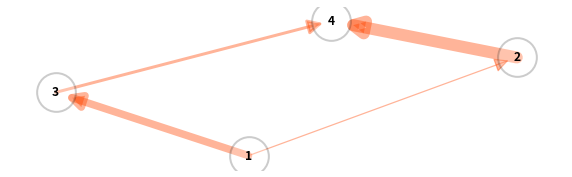

In [556]:
plot_graph_with_weight(FG, direct=True)

# 日本語の表示

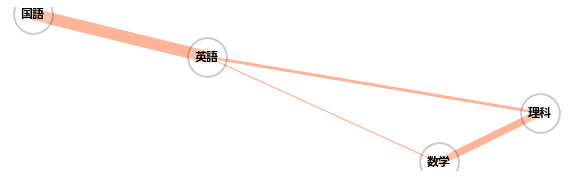

In [557]:
FG = nx.Graph()
FG.add_weighted_edges_from([("数学", "英語", 0.125), ("数学", "理科", 0.75), ("国語", "英語", 1.2), ("英語", "理科", 0.3)])
plot_graph_with_weight(FG, direct=False)